In [1]:
import matplotlib.pyplot as plt
from regulators.PID import PID
import numpy as np

In [2]:
umin = -1
umax = 1

alpha1 = -1.489028
alpha2 = 0.535261
beta1 = 0.012757
beta2 = 0.010360

u_sym = np.linspace(umin, umax, 1000)

y = []
for u in u_sym:
    g1 = (np.exp(7.5 * u) - 1) / (np.exp(7.5 * u) + 1)
    y_val = 1.2 * (1 - np.exp(-1.5 * ((beta2 + beta1) * g1 / (1 + alpha1 + alpha2))))
    y.append(y_val)

y = np.array(y)

Text(0.5, 1.0, 'Static Characteristic')

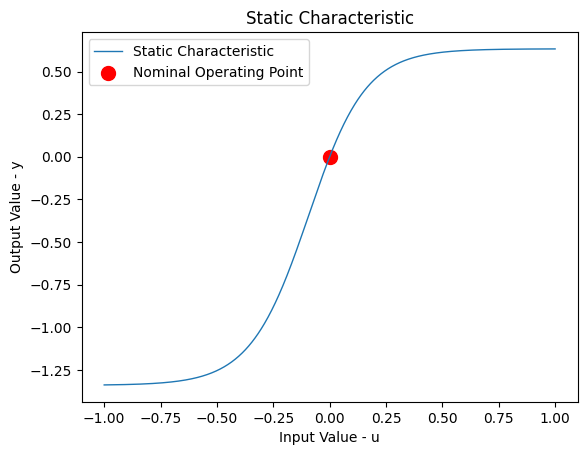

In [3]:
plt.plot(u_sym, y, linewidth=1, label="Static Characteristic")
plt.scatter(0, 0, color="r", s=100, label="Nominal Operating Point")
plt.legend()
plt.xlabel("Input Value - u")
plt.ylabel("Output Value - y")
plt.title("Static Characteristic")

In [4]:
pid2 = PID(0.5, 5, 0.4)

In [5]:
y_list = []
k_min = 6
k_max = 1000
k = np.arange(k_min, k_max)
for s in k:
    y = pid2.main_loop()
    y_list.append(y)

Text(0.5, 1.0, 'Static Characteristic')

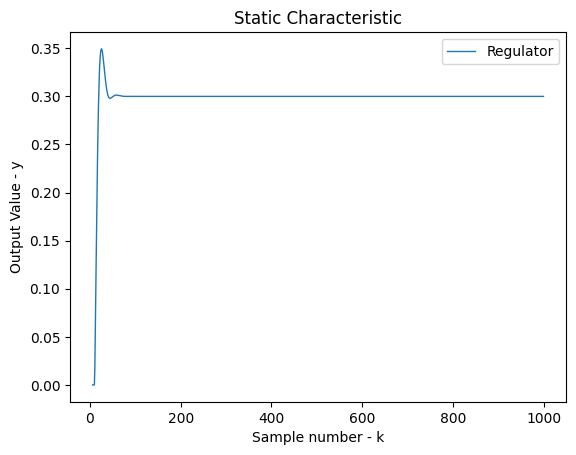

In [6]:
plt.plot(k, y_list, linewidth=1, label="Regulator")
plt.legend()
plt.xlabel("Sample number - k")
plt.ylabel("Output Value - y")
plt.title("Static Characteristic")